In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def F(x, y, z):
    sig = 10.
    r   = 28.
    b   = 8. / 3.
    
    dxdt = -sig * x + sig * y
    dydt = -x * z + r * x - y
    dzdt = x * y - b * z
    
    return dxdt, dydt, dzdt


def RK4(ts, x0, y0, z0):
    dt = ts[1] - ts[0]
    xyz = np.full((len(ts), 3), np.nan, dtype = float)
    
    for n, t in enumerate(ts):
        if n == 0:
            xyz[n] = [x0, y0, z0]
        else:
            q1 = dt * np.array([*F(xyz[n - 1, 0], xyz[n - 1, 1], xyz[n - 1, 2])], dtype = float)
            q2 = dt * np.array([*F(xyz[n - 1, 0] + q1[0] / 2., xyz[n - 1, 1] + q1[1] / 2., xyz[n - 1, 2] + q1[2] / 2.)], dtype = float)
            q3 = dt * np.array([*F(xyz[n - 1, 0] + q2[0] / 2., xyz[n - 1, 1] + q2[1] / 2., xyz[n - 1, 2] + q2[2] / 2.)], dtype = float)
            q4 = dt * np.array([*F(xyz[n - 1, 0] + q3[0], xyz[n - 1, 1] + q3[1], xyz[n - 1, 2] + q3[2])], dtype = float)
            xyz[n] = xyz[n - 1] + (q1 + 2. * q2 + 2. * q3 + q4) / 6.
            
    return xyz

# (a)

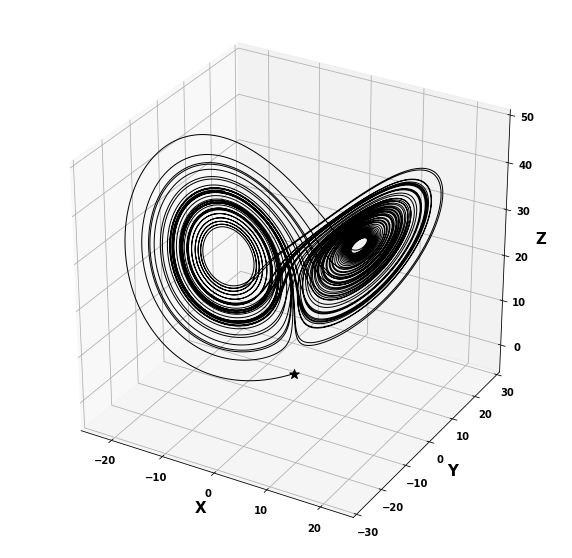

In [4]:
dt = 0.001
ts = np.arange(0., 70. + dt, dt)

x0, y0, z0 = -0.001, -0.001, 0.

xyz = RK4(ts, x0, y0, z0)

fig = plt.figure(figsize = (10, 10))
sub = fig.add_subplot(111, projection = "3d")

sub.plot(xyz[:, 0], xyz[:, 1], xyz[:, 2], c = "k", lw = 1)

sub.scatter(x0, y0, z0, c = "k", marker = "*", s = 100)

sub.set_xlabel("X", fontsize = 15)
sub.set_ylabel("Y", fontsize = 15)
sub.set_zlabel("Z", fontsize = 15)

sub.set_xlim(-25, 25)
sub.set_ylim(-30, 30)
sub.set_zlim(-5, 50)

plt.savefig("./HW3_2/1.png", dpi = 500, bbox_inches = "tight")

# (b)

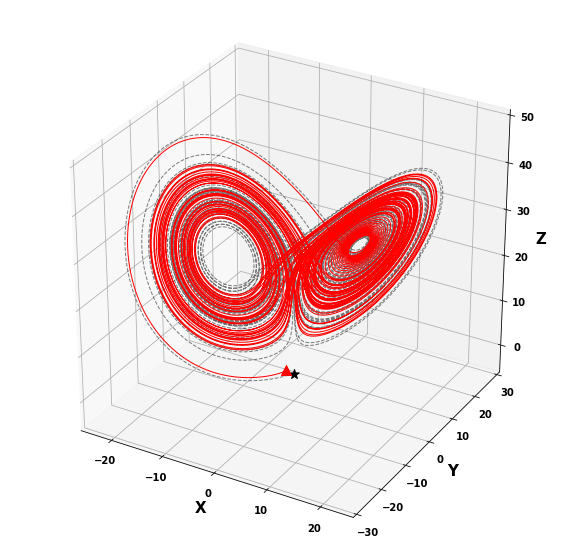

In [5]:
x0, y0, z0 = -0.001, -0.001, 0.

xyz  = RK4(ts, x0, y0, z0)
xyz1 = RK4(ts, x0 - 1., y0 - 1., z0 + 1.)

fig = plt.figure(figsize = (10, 10))
sub = fig.add_subplot(111, projection = "3d")

sub.plot(xyz[:, 0],  xyz[:, 1],  xyz[:, 2],  c = "k", lw = 1, ls = "--", alpha = 0.5)
sub.plot(xyz1[:, 0], xyz1[:, 1], xyz1[:, 2], c = "r", lw = 1)

sub.scatter(x0, y0, z0, c = "k", marker = "*", s = 100)
sub.scatter(x0 - 1., y0 - 1., z0 + 1., c = "r", marker = "^", s = 100)

sub.set_xlabel("X", fontsize = 15)
sub.set_ylabel("Y", fontsize = 15)
sub.set_zlabel("Z", fontsize = 15)

sub.set_xlim(-25, 25)
sub.set_ylim(-30, 30)
sub.set_zlim(-5, 50)

plt.savefig("./HW3_2/2.png", dpi = 500, bbox_inches = "tight")

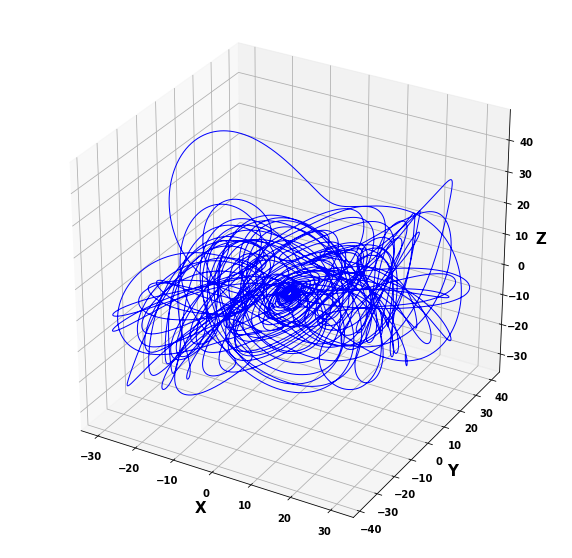

In [6]:
diff = xyz1 - xyz

fig = plt.figure(figsize = (10, 10))
sub = fig.add_subplot(111, projection = "3d")

sub.plot(diff[:, 0], diff[:, 1], diff[:, 2], c = "b", lw = 1)

sub.set_xlabel("X", fontsize = 15)
sub.set_ylabel("Y", fontsize = 15)
sub.set_zlabel("Z", fontsize = 15)

plt.savefig("./HW3_2/3.png", dpi = 500, bbox_inches = "tight")

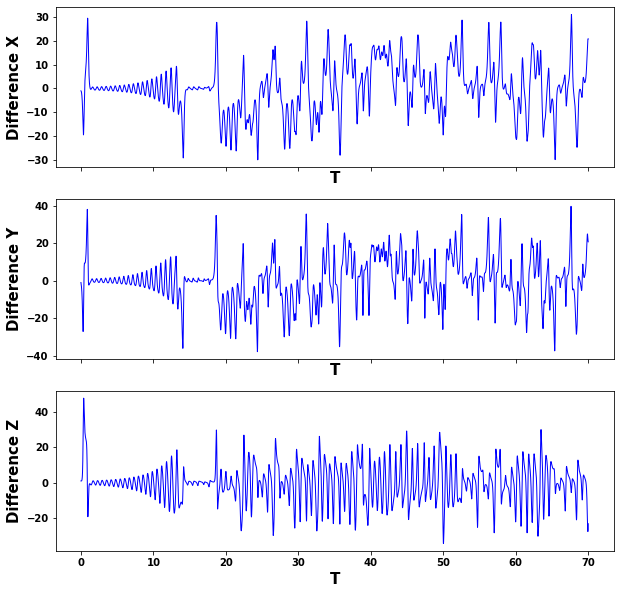

In [7]:
fig, subs = plt.subplots(nrows = 3, figsize = (10, 10), sharex = True)
labels = ["X", "Y", "Z"]

for i in range(3):
    sub = subs[i]
    
    sub.plot(ts, diff[:, i], c = "b", lw = 1)
    
    sub.set_xlabel("T", fontsize = 15)
    sub.set_ylabel("Difference %s" % labels[i], fontsize = 15)
    
plt.savefig("./HW3_2/4.png", dpi = 500, bbox_inches = "tight")

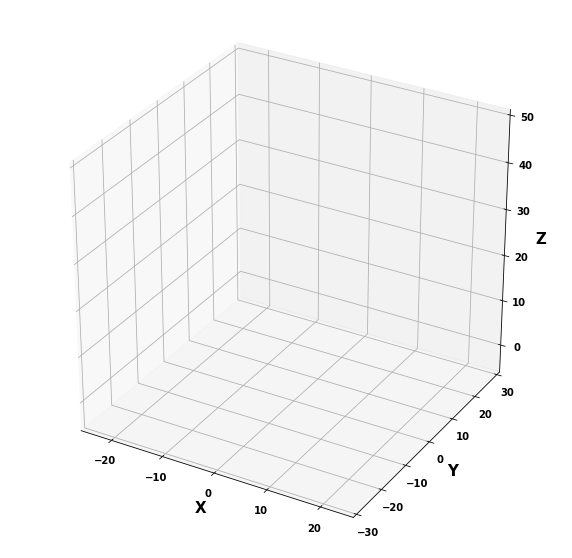

In [67]:
fig = plt.figure(figsize = (10, 10))
sub = fig.add_subplot(111, projection = "3d")

sub.set_xlim(-25, 25)
sub.set_ylim(-30, 30)
sub.set_zlim(-5, 50)

sub.set_xlabel("X", fontsize = 15)
sub.set_ylabel("Y", fontsize = 15)
sub.set_zlabel("Z", fontsize = 15)

line,  = sub.plot([], [], [], c = "k", lw = 0.5)
point, = sub.plot([], [], [], c = "k", marker = "o", markersize = 10)
text  = sub.text(-25, 30, 50, "", fontsize = 15)

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    
    point.set_data([], [])
    point.set_3d_properties([])
    
    text.set_text("")
    
    return (line, point, text,)

def animate(i):
    line.set_data(xyz[: i + 1, 0], xyz[: i + 1, 1])
    line.set_3d_properties(xyz[: i + 1, 2])
    
    point.set_data(xyz[i, 0], xyz[i, 1])
    point.set_3d_properties(xyz[i, 2])
    
    text.set_text("t = %.1f" % ts[i])
    
    return (line, point, text,)

anim = animation.FuncAnimation(fig, animate, init_func = init, frames = np.arange(len(ts))[:: 100], interval = 100, blit = False)

anim.save("./HW3_2/anim.mp4")

HTML(anim.to_html5_video())